# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Bật tính năng để tắt các cảnh báo đi
import warnings
warnings.filterwarnings('ignore')

# Read data 

| column  | description   | 
|---|---|
|ID number   
|Diagnosis| 	M = ác tính, b = lành tính|
|radius_mean| 	giá trị trung bình của khoảng cách từ tâm đến các điểm trên chu vi 	|
|texture_mean|   kết cấu (độ lệch tiêu chuẩn của các giá trị thang xám) | 	
|perimeter_mean| chu vi	 | 	
|area_mean| 	diện tích |	
|smoothness_mean| 	độ nhẵn (sự thay đổi cục bộ trong độ dài bán kính)| 	
|compactness_mean| độ chặt (chu vi ^ 2 / area - 1,0)	 |	
|concavity_mean| 	độ lõm (mức độ nghiêm trọng của các phần lõm của đường viền)|	
|concave points_mean| 	 các điểm lõm (số lượng các phần lõm của đường viền)| 	
|symmetry_mean| 	đối xứng |	
|fractal_dimension_mean| 	 kích thước fractal ("xấp xỉ đường bờ biển" - 1) |	

In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# select feature
df.drop(labels=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis= 1, inplace=True)

In [7]:
df.shape

(569, 12)

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


# Vizualization

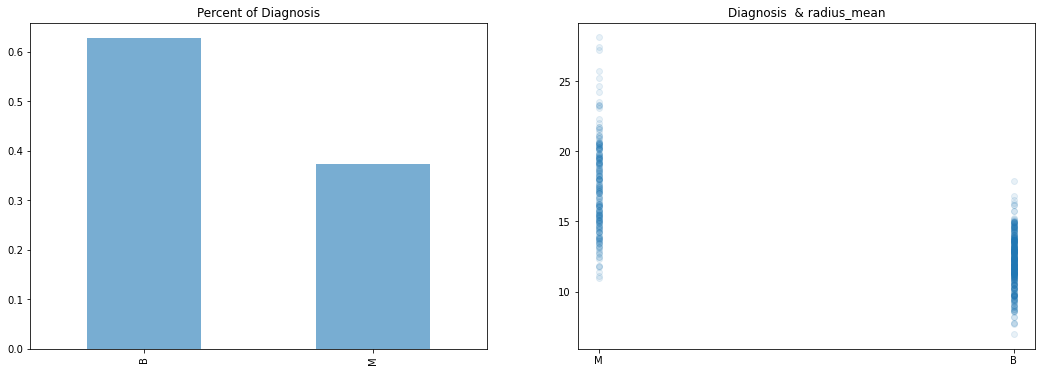

In [10]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((1,2),(0,0))
df.diagnosis.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Percent of Diagnosis")

plt.subplot2grid((1,2),(0,1))
plt.scatter(df.diagnosis, df.radius_mean, alpha=.1)
plt.title("Diagnosis  & radius_mean")

plt.show()

 => H1: Tỉ lệ khối u là ác tính chiếm 63%. 
 
   H2: Những khối u có bán kính trung bình càng lớn thì khả năng trở thành u ác tính cao hơn. Bán kính trung bình nhiều nhất khoảng [12, 16]

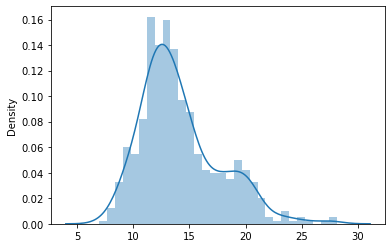

In [11]:
sns.distplot(x=df['radius_mean'], bins= 30);

=> Bán kính trung bình chủ yếu từ [12, 15]

In [12]:
# Tỷ lệ sóng sót của trẻ con đi cùng phụ huynh có cao hơn trẻ con không có phụ huynh?
pd.pivot_table(df, index = 'diagnosis', values = [ 'radius_mean', 'perimeter_mean',
       'area_mean' ,'concavity_mean'])

,area_mean,concavity_mean,perimeter_mean,radius_mean
diagnosis,,,,
B,462.790196,0.046058,78.075406,12.146524
M,978.376415,0.160775,115.365377,17.462830


=> Col_1, col_3: Ta thấy diện tích và chu vi tỉ lệ nghịch với khả năng của khối U trở thành ác tính.

Col_2: Các điểm lõm trung bình của khối U ác gấp 4 lần khối u lành tính.

Col_4: Bán kính trung bình của khối U ác là 17,46  gấp 1,5 lần so với bán kính khối U lành tính.

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
labelcoder = LabelEncoder()
df.iloc[:,1] = labelcoder.fit_transform(df.iloc[:, 1].values)

In [27]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Splitting Data into Training and Test Sets & feature scaling

In [15]:
# independent and dependent datasets 
X = df.iloc[:, 2:].values

y = df.iloc[:,1].values

In [16]:
# Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
X_train

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.95286585,
        -1.72936805, -0.9415409 ],
       [-0.20468665,  0.31264011, -0.13367256, ...,  0.89844062,
         1.17876963,  1.47437716],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.76458843,
         0.27534303, -0.50102373],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.09724713,
        -1.09099637, -1.2255221 ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  0.44652193,
        -0.48995636,  0.39247807],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.79446954,
        -0.22863462, -0.80855459]])

# Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

# Prediction

In [20]:
y_preds = clf.predict(X_test)

In [21]:
pd.DataFrame({"y": y_test, "y_preds": y_preds}).head(10)

,y,y_preds
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


# Evaluation

In [22]:
from sklearn import metrics
print("Logistic regression Accuracy: ", metrics.accuracy_score(y_test, y_preds))

Logistic regression Accuracy:  0.965034965034965


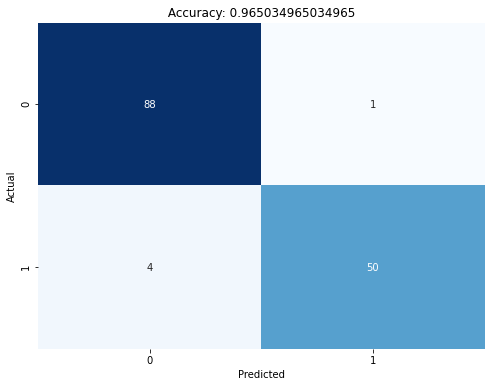

In [26]:
# Vizualization metrics
from sklearn import metrics
acc_score =  metrics.accuracy_score(y_test, y_preds)
cm = metrics.confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Accuracy: {0} ".format(acc_score));